# CSC 466 Senate Twitter Data Preprocessing

Bella White, Nathan Lee, Vance Winstead

In [10]:
import json
import os
import pandas as pd
import tweepy
import numpy as np

## Twitter Screennames Associated with Senators

In [2]:
senator_screen_names = ["VP", "SenatorLeahy", "SenShelby", "TTuberville", "lisamurkowski", "SenDanSullivan", "SenatorSinema", "CaptMarkKelly", "SenTomCotton", "SenFeinstein", "AlexPadilla4CA", "Hickenlooper", "SenBlumenthal", "ChrisMurphyCT",
                       "SenatorCarper", "ChrisCoons", "marcorubio", "SenRickScott", "ossoff", "SenatorWarnock", "SenBrianSchatz", "brianschatz", "mazieforhawaii", "maziehirono", "SenatorRisch", "Risch4Idaho", "SenatorDurbin", "DickDurbin", 
                       "SenDuckworth", "TammyDuckworth", "SenToddYoung", "ToddYoungIN", "SenatorBraun", "braun4indiana", "ChuckGrassley", "SenJoniErnst", "joniernst", "JerryMoran", "RogerMarshallMD", "LeaderMcConnell", "RandPaul", "BillCassidy", 
                       "SenBillCassidy", "SenJohnKennedy", "SenatorCollins", "SenSusanCollins", "SenAngusKing", "SenatorCardin", "BenCardinforMD", "ChrisVanHollen", "VanHollenForMD", "SenWarren", "ewarren", "SenMarkey", "EdMarkey", "SenStabenow", 
                       "stabenow", "SenGaryPeters", "GaryPeters", "amyklobuchar", "SenAmyKlobuchar", "SenTinaSmith", "TinaSMithMN", "SenatorWicker", "RogerWicker", "SenHydeSmith", "cindyhydesmith", "RoyBlunt", "RoyBluntMO", "HawleyMO", "SenatorTester",
                       "jontester", "SteveDaines", "DainesforMT", "SenatorFischer", "DebFischerNE", "BenSasse", "SenCortezMasto", "CortezMasto", "SenJackyRosen", "RosenforNevada", "SenatorShaheen", "JeanneShaeen", "SenatorHassan", "Maggie_Hassan",
                       "SenatorMenendez", "BobMenendezNJ", "CoryBooker", "SenBooker", "MartinHeinrich", "TeamHeinrich", "SenatorLujan", "benraylujan", "SenSchumer", "chuckschumer", "SenGillibrand", "gillibrandny", "SenatorBurr", "RichardBurr_DN", 
                       "SenThomTillis", "ThomTillis", "SenJohnHoeven", "SenKevinCramer", "kevincramer", "SenSherrodBrown", "SherrodBrown", "senrobportman", "robportman", "JimInhofe", "inhofeforsenate", "SenatorLankford", "jameslankford", "RonWyden", 
                       "WydenPress", "SenJeffMerkley", "SenBobCasey", "Bob_Casey", "SenToomey", "SenJackReed", "SenWhitehouse", "SheldonforRI", "LindseyGrahamSC", "SenatorTimScott", "votetimscott", "SenJohnThune", "SenatorRounds", "RoundsforSenate", 
                       "MarshaBlackburn", "VoteMarsha", "BillHagertyTN", "SenatorHagerty", "JohnCornyn", "TeamCornyn", "tedcruz", "SenTedCruz", "SenMikeLee", "MittRomney", "SenatorRomney", "BernieSanders", "SenSanders", "MarkWarner", "MarkWarnerVA", 
                       "timkaine", "PattyMurray", "MurrayCampaign", "SenatorCantwell", "MariaCantwell", "Sen_JoeManchin", "SenCapito", "CapitoforWV", "SenRonJohnson", "RonJohnsonWI", "SenatorBaldwin", "tammybaldwin", "SenJohnBarrasso", "barrassoforwyo", 
                       "SenLummis", "CynthiaMLummis"]

## Load List of Tweets from CSV

Tweet data compiled by https://github.com/alexlitel/congresstweets
Forked repo and downloaded all the CSV files from 2020

In [5]:
json_files = [pos_json for pos_json in os.listdir(r'C:\Users\bella\OneDrive\Documents\GitHub\congresstweets\data') if pos_json.endswith('.json')]
all_df = []
for j in json_files:
    j_df = (pd.read_json("C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/"+j, encoding="utf8"))
    j_df['tweet_id'] = j_df.apply(lambda row: row.link[-19:], axis=1)
    j_df['is_rt'] = j_df['text'].str.startswith('RT')
    j_df = j_df[j_df.is_rt == False]
    all_df.append(j_df[j_df.screen_name.isin(senator_screen_names)])
senators_df = pd.concat(all_df)

C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-01.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-02.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-03.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-04.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-05.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-06.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-07.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-08.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-09.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-10.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-11.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-12.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-01-13.json

C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-17.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-18.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-19.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-20.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-21.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-22.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-23.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-24.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-25.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-26.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-27.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-28.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-04-29.json

C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-04.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-05.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-06.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-07.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-08.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-09.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-10.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-11.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-12.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-13.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-14.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-15.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-08-16.json

C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-11-20.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-11-21.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-11-22.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-11-23.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-11-24.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-11-25.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-11-26.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-11-27.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-11-28.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-11-29.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-11-30.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-12-01.json
C:/Users/bella/OneDrive/Documents/GitHub/congresstweets/data/2020-12-02.json

## Sample the Twitter Data

In [8]:
senators_df = pd.concat(all_df)
senators_df = senators_df.sample(n=10000, random_state=2489)
senators_df = senators_df.reset_index()

,index,id,screen_name,user_id,time,link,text,source,tweet_id,is_rt
0,2300,1296205301654282240,DainesforMT,214767677,2020-08-19T18:00:00-04:00,https://www.twitter.com/DainesforMT/statuses/1...,"Unlike my liberal opponent, I will always vote...",TweetDeck,1296205301654282240,False
1,860,1242924907211763712,SenatorDurbin,247334603,2020-03-25T17:22:44-04:00,https://www.twitter.com/SenatorDurbin/statuses...,"Beyond the State’s ongoing response efforts, w...",Twitter for iPhone,1242924907211763714,False
2,247,1221806466262360064,HawleyMO,2352629311,2020-01-27T09:45:36-05:00,https://www.twitter.com/HawleyMO/statuses/1221...,I say again: if the Senate is going to call wi...,Twitter for iPhone,1221806466262360064,False
3,1315,1288147224875208704,SenSchumer,17494010,2020-07-28T12:20:05-04:00,https://www.twitter.com/SenSchumer/statuses/12...,We all want our schools to re-open.\n\nBut the...,Twitter Media Studio,1288147224875208704,False
4,3106,1294056896261849088,SenJeffMerkley,29201047,2020-08-13T19:43:01-04:00,https://www.twitter.com/SenJeffMerkley/statuse...,@wweek confirmed that the Trump administration...,Twitter for iPhone,1294056896261849088,False
...,...,...,...,...,...,...,...,...,...,...
9995,1563,1232683275241607168,SenSchumer,17494010,2020-02-26T10:06:09-05:00,https://www.twitter.com/SenSchumer/statuses/12...,To the Department of Justice:\n\nRichard Grene...,Twitter Web App,1232683275241607168,False
9996,1169,1312406170594926592,SenRickScott,131546062,2020-10-03T10:56:29-04:00,https://www.twitter.com/SenRickScott/statuses/...,I misspoke this morning in my @FoxNews intervi...,Twitter for iPhone,1312406170594926593,False
9997,2625,1237418432536117248,SenMarkey,21406834,2020-03-10T12:41:59-04:00,https://www.twitter.com/SenMarkey/statuses/123...,"During an emergency, whether it’s a house fire...",Twitter Web App,1237418432536117249,False
9998,910,1253089447656271872,SenFeinstein,476256944,2020-04-22T18:33:00-04:00,https://www.twitter.com/SenFeinstein/statuses/...,The next round of coronavirus relief legislati...,TweetDeck,1253089447656271872,False


## Get More Info from Twitter API

Retrieve 900 tweets every 15 minute to conform to API bandwidth restrictions

In [12]:
import time
import datetime
auth = tweepy.OAuth2BearerHandler(API_KEY)
api = tweepy.API(auth)

def getTweet(row):
    if row.name != 0 and row.name % 900 == 0:
        print("Tweets Retrieved: ", row.name, " I'm going to sleep now. It is: ", datetime.datetime.now())
        time.sleep(900)
        print("I have awoken. It is : ", datetime.datetime.now())
    try:
        return api.get_status(row.tweet_id, tweet_mode="extended")
    except Exception as e:
        print(row.link)
        print(e)
        return np.nan

senators_df['tweet_object'] = senators_df.apply(lambda row: getTweet(row), axis=1)

https://www.twitter.com/BernieSanders/statuses/1230891314008535040
404 Not Found
144 - No status found with that ID.
https://www.twitter.com/MurrayCampaign/statuses/1226918682091126788
404 Not Found
144 - No status found with that ID.
https://www.twitter.com/SenTedCruz/statuses/1305611574661570562
404 Not Found
144 - No status found with that ID.
https://www.twitter.com/JerryMoran/statuses/1218267139649540096
404 Not Found
144 - No status found with that ID.
Tweets Retrieved:  900  I'm going to sleep now. It is:  2022-03-08 13:21:22.363133
I have awoken. It is :  2022-03-08 13:36:22.367743
https://www.twitter.com/lisamurkowski/statuses/1236035207200899077
404 Not Found
144 - No status found with that ID.
https://www.twitter.com/SenTedCruz/statuses/1327313721669148674
404 Not Found
144 - No status found with that ID.
https://www.twitter.com/SenTedCruz/statuses/1295722325799841793
404 Not Found
144 - No status found with that ID.
https://www.twitter.com/ThomTillis/statuses/12661472045463

,index,id,screen_name,user_id,time,link,text,source,tweet_id,is_rt,tweet_object
0,2300,1296205301654282240,DainesforMT,214767677,2020-08-19T18:00:00-04:00,https://www.twitter.com/DainesforMT/statuses/1...,"Unlike my liberal opponent, I will always vote...",TweetDeck,1296205301654282240,False,Status(_api=<tweepy.api.API object at 0x000001...
1,860,1242924907211763712,SenatorDurbin,247334603,2020-03-25T17:22:44-04:00,https://www.twitter.com/SenatorDurbin/statuses...,"Beyond the State’s ongoing response efforts, w...",Twitter for iPhone,1242924907211763714,False,Status(_api=<tweepy.api.API object at 0x000001...
2,247,1221806466262360064,HawleyMO,2352629311,2020-01-27T09:45:36-05:00,https://www.twitter.com/HawleyMO/statuses/1221...,I say again: if the Senate is going to call wi...,Twitter for iPhone,1221806466262360064,False,Status(_api=<tweepy.api.API object at 0x000001...
3,1315,1288147224875208704,SenSchumer,17494010,2020-07-28T12:20:05-04:00,https://www.twitter.com/SenSchumer/statuses/12...,We all want our schools to re-open.\n\nBut the...,Twitter Media Studio,1288147224875208704,False,Status(_api=<tweepy.api.API object at 0x000001...
4,3106,1294056896261849088,SenJeffMerkley,29201047,2020-08-13T19:43:01-04:00,https://www.twitter.com/SenJeffMerkley/statuse...,@wweek confirmed that the Trump administration...,Twitter for iPhone,1294056896261849088,False,Status(_api=<tweepy.api.API object at 0x000001...
...,...,...,...,...,...,...,...,...,...,...,...
9995,1563,1232683275241607168,SenSchumer,17494010,2020-02-26T10:06:09-05:00,https://www.twitter.com/SenSchumer/statuses/12...,To the Department of Justice:\n\nRichard Grene...,Twitter Web App,1232683275241607168,False,Status(_api=<tweepy.api.API object at 0x000001...
9996,1169,1312406170594926592,SenRickScott,131546062,2020-10-03T10:56:29-04:00,https://www.twitter.com/SenRickScott/statuses/...,I misspoke this morning in my @FoxNews intervi...,Twitter for iPhone,1312406170594926593,False,Status(_api=<tweepy.api.API object at 0x000001...
9997,2625,1237418432536117248,SenMarkey,21406834,2020-03-10T12:41:59-04:00,https://www.twitter.com/SenMarkey/statuses/123...,"During an emergency, whether it’s a house fire...",Twitter Web App,1237418432536117249,False,Status(_api=<tweepy.api.API object at 0x000001...
9998,910,1253089447656271872,SenFeinstein,476256944,2020-04-22T18:33:00-04:00,https://www.twitter.com/SenFeinstein/statuses/...,The next round of coronavirus relief legislati...,TweetDeck,1253089447656271872,False,Status(_api=<tweepy.api.API object at 0x000001...


## Extract Information from Tweet Object and Save to CSV

In [19]:

senator_df = senators_df[senators_df.tweet_object.notna()]
senator_df["full_name"] = senator_df.apply(lambda row: row.tweet_object.user.name, axis=1)
senator_df["full_text"] = senator_df.apply(lambda row: row.tweet_object.full_text, axis=1)
senator_df["followers_count"] = senator_df.apply(lambda row: row.tweet_object.user.followers_count, axis=1)
senator_df["following_count"] = senator_df.apply(lambda row: row.tweet_object.user.friends_count, axis=1)
senator_df["num_posts_user_liked"] = senator_df.apply(lambda row: row.tweet_object.user.favourites_count, axis=1)
senator_df["num_tweets_user_posted"] = senator_df.apply(lambda row: row.tweet_object.user.statuses_count, axis=1)
senator_df["is_quote"] = senator_df.apply(lambda row: row.tweet_object.is_quote_status, axis=1)
senator_df["tweet_retweets"] = senator_df.apply(lambda row: row.tweet_object.retweet_count, axis=1)
senator_df["tweet_likes"] = senator_df.apply(lambda row: row.tweet_object.favorite_count, axis=1)

senator_df = senator_df[senator_df["is_quote"] == False]

senator_df.to_csv("senate_tweets.csv")

C:\Users\bella\AppData\Local\Temp/ipykernel_20260/133169358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senator_df["full_name"] = senator_df.apply(lambda row: row.tweet_object.user.name, axis=1)
C:\Users\bella\AppData\Local\Temp/ipykernel_20260/133169358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senator_df["full_text"] = senator_df.apply(lambda row: row.tweet_object.full_text, axis=1)
C:\Users\bella\AppData\Local\Temp/ipykernel_20260/133169358.py:5: SettingWithCopyWarning: 
A value is tryi

## Explore Data and Generate Plots

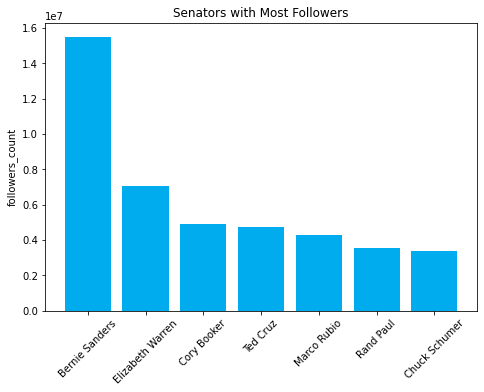

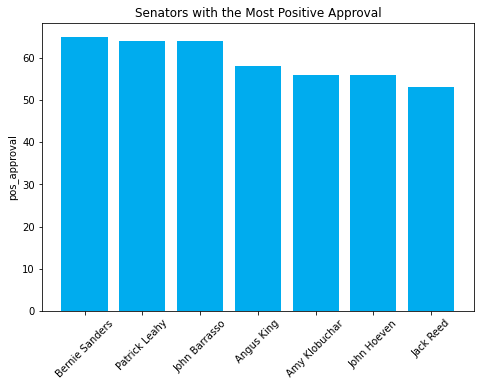

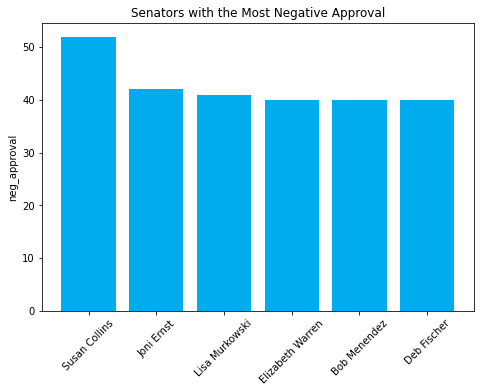

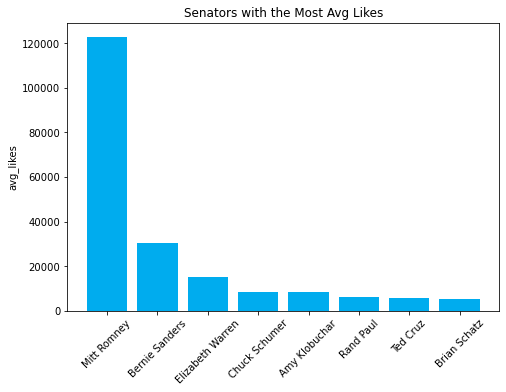

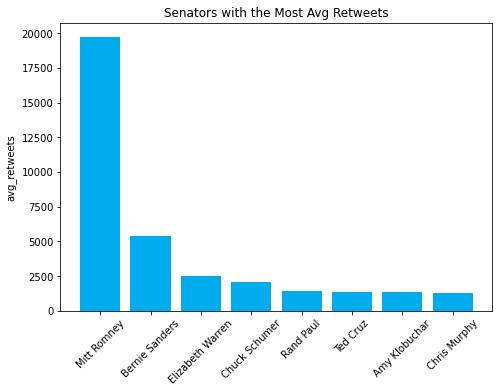

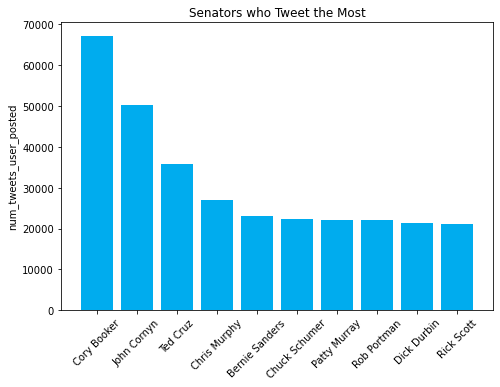

In [62]:
def genPlots(df, title, x, y):
    df_sorted = df.sort_values(y, ascending=False)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(df_sorted[x].head(10), df_sorted[y].head(10), color = '#00acee')
    ax.set_ylabel(y)
    ax.set_title(title)
    plt.xticks(rotation=45)
    plt.show()

genPlots(senator_tweets, "Senators with Most Followers" ,'name', 'followers_count')
genPlots(senator_tweets, "Senators with the Most Positive Approval",'name', 'pos_approval')
genPlots(senator_tweets, "Senators with the Most Negative Approval",'name', 'neg_approval')
genPlots(senator_tweets, "Senators with the Most Avg Likes",'name', 'avg_likes')
genPlots(senator_tweets, "Senators with the Most Avg Retweets",'name', 'avg_retweets')
genPlots(senator_tweets, "Senators who Tweet the Most",'name', 'num_tweets_user_posted')